In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Car details v3.csv')

In [3]:
print("Перші декілька рядків даних:")
print(data.head())

Перші декілька рядків даних:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 

In [4]:
print("\nЗагальна інформація про датасет:")
print(data.info())


Загальна інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [5]:
print("\nТипи даних:")
print(data.dtypes)


Типи даних:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


In [6]:
#3. Проведіть кореляційний аналіз. Визначте залежну та незалежні змінні. Побудуйте візуалізації.
dependent_variable = 'selling_price'

In [7]:
# Вибір числових змінних для кореляційного аналізу
numeric_variables = data.select_dtypes(include=['int64', 'float64'])

In [8]:
# Побудова кореляційної матриці
correlation_matrix = numeric_variables.corr()

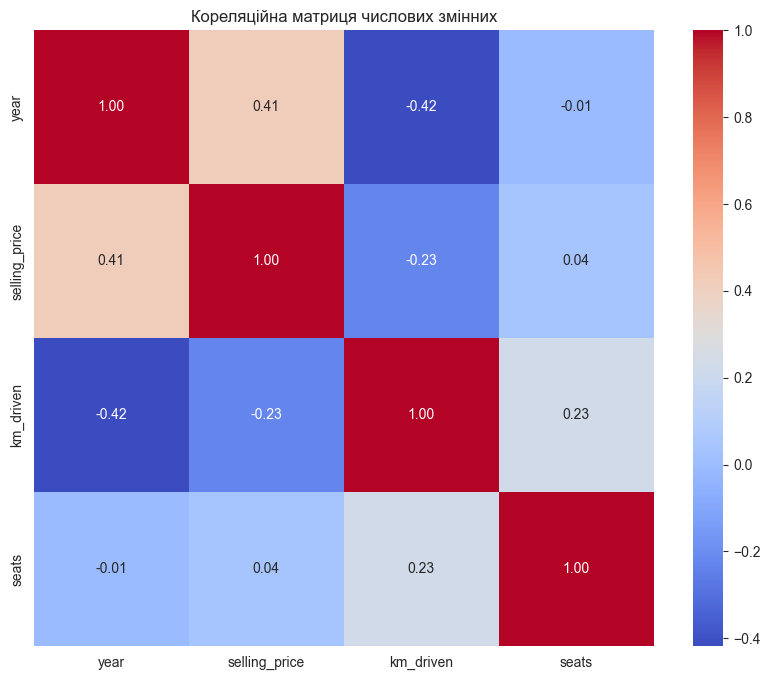

In [9]:
# Візуалізація кореляційної матриці за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця числових змінних')
plt.show()

In [10]:
# Кореляція між залежною змінною та іншими числовими змінними
correlation_with_dependent_variable = correlation_matrix[dependent_variable].sort_values(ascending=False)
print("Кореляція залежної змінної з іншими числовими змінними:")
print(correlation_with_dependent_variable)

Кореляція залежної змінної з іншими числовими змінними:
selling_price    1.000000
year             0.414092
seats            0.041358
km_driven       -0.225534
Name: selling_price, dtype: float64


In [11]:
import scipy.stats as st
pd_corr_p = data[['selling_price', 'km_driven']].corr(method='pearson').iloc[0, 1]
pd_corr_s = data[['selling_price', 'km_driven']].corr(method='spearman').iloc[0, 1]
pd_corr_k = data[['selling_price', 'km_driven']].corr(method='kendall').iloc[0, 1]

print(f'Коефіцієнт кореляції Пірсона: {pd_corr_p:.3f}')
print(f'Коефіцієнт кореляції Спірмена: {pd_corr_s:.3f}')
print(f'Коефіцієнт кореляції Кендалла: {pd_corr_k:.3f}')

Коефіцієнт кореляції Пірсона: -0.226
Коефіцієнт кореляції Спірмена: -0.355
Коефіцієнт кореляції Кендалла: -0.243


In [12]:
'''Значення Коефіцієнтів кореляції
Коефіцієнт кореляції Пірсона:

-0.226
свідчить про слабкий негативний зв'язок між змінними.
Це означає, що збільшення однієї змінної супроводжується зменшенням іншої.
Коефіцієнт кореляції Спірмена:

-0.355
також свідчить про слабкий негативний зв'язок,
але трохи сильніший,
ніж за коефіцієнтом Пірсона.
Коефіцієнт кореляції Кендалла:

-0.243
схожий за значенням на коефіцієнт Пірсона.'''

"Значення Коефіцієнтів кореляції\nКоефіцієнт кореляції Пірсона:\n\n-0.226\nсвідчить про слабкий негативний зв'язок між змінними.\nЦе означає, що збільшення однієї змінної супроводжується зменшенням іншої.\nКоефіцієнт кореляції Спірмена:\n\n-0.355\nтакож свідчить про слабкий негативний зв'язок,\nале трохи сильніший,\nніж за коефіцієнтом Пірсона.\nКоефіцієнт кореляції Кендалла:\n\n-0.243\nсхожий за значенням на коефіцієнт Пірсона."

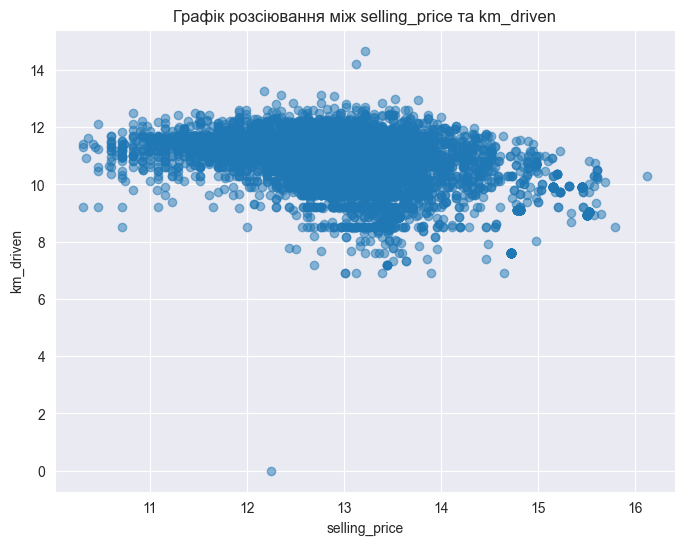

"Більшість точок розташовані в області з негативним нахилом.\nЦе свідчить про наявність негативного зв'язку між змінними:\nзбільшення пробігу призводить до зменшення ціни продажу.\nІснує деяка дисперсія точок навколо лінії регресії.\nЦе свідчить про те, що на ціну продажу впливають й інші фактори, окрім пробігу."

In [13]:
# Визначення змінних для аналізу
variable1 = 'selling_price'
variable2 = 'km_driven'

# Побудова графіка розсіювання
plt.figure(figsize=(8, 6))
plt.scatter(np.log(data[variable1]), np.log(data[variable2]), alpha=0.5)
plt.title(f'Графік розсіювання між {variable1} та {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.grid(True)
plt.show()

'''Більшість точок розташовані в області з негативним нахилом.
Це свідчить про наявність негативного зв'язку між змінними:
збільшення пробігу призводить до зменшення ціни продажу.
Існує деяка дисперсія точок навколо лінії регресії.
Це свідчить про те, що на ціну продажу впливають й інші фактори, окрім пробігу.'''

"Більшість точок розташовані в області з позитивним нахилом.\nЦе свідчить про наявність позитивного зв'язку між змінними:\nзбільшення року призводить до збільшення ціни продажу.\nІснує деяка дисперсія точок навколо лінії регресії.\nЦе свідчить про те, що на ціну продажу впливають й інші фактори, окрім року"

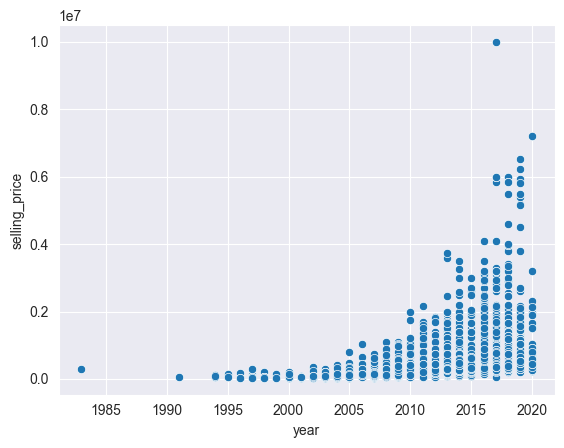

In [14]:
sns.scatterplot(x="year", y="selling_price", data=data)
'''Більшість точок розташовані в області з позитивним нахилом.
Це свідчить про наявність позитивного зв'язку між змінними:
збільшення року призводить до збільшення ціни продажу.
Існує деяка дисперсія точок навколо лінії регресії.
Це свідчить про те, що на ціну продажу впливають й інші фактори, окрім року'''

"Більшість точок розташовані в області з негативним нахилом.\nЦе свідчить про наявність негативного зв'язку між змінними:\nзбільшення пробігу призводить до зменшення ціни продажу.\nІснує деяка дисперсія точок навколо лінії регресії.\nЦе свідчить про те, що на ціну продажу впливають й інші фактори, окрім пробігу."

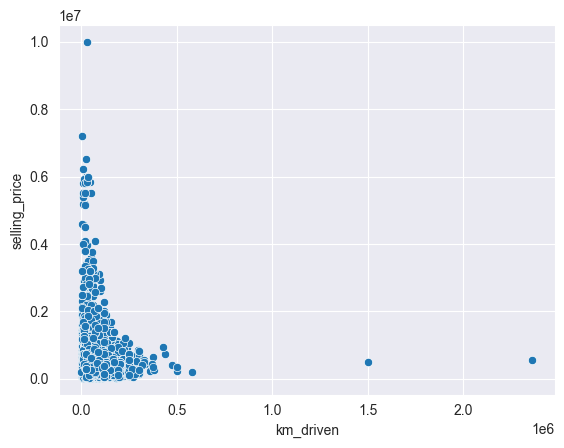

In [15]:
sns.scatterplot(x="km_driven", y="selling_price", data=data)
'''Більшість точок розташовані в області з негативним нахилом.
Це свідчить про наявність негативного зв'язку між змінними:
збільшення пробігу призводить до зменшення ціни продажу.
Існує деяка дисперсія точок навколо лінії регресії.
Це свідчить про те, що на ціну продажу впливають й інші фактори, окрім пробігу.'''

<Axes: xlabel='transmission', ylabel='selling_price'>

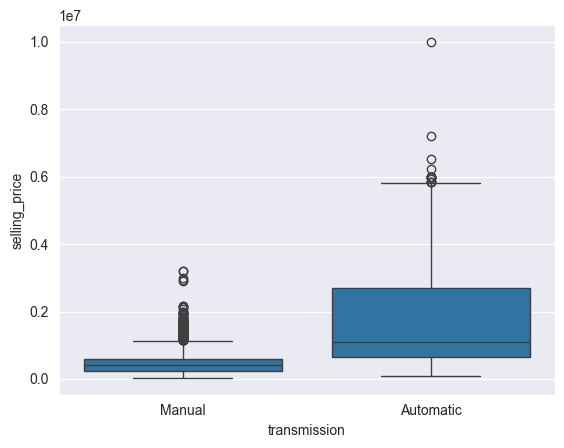

In [16]:
sns.boxplot(x="transmission", y="selling_price", data=data)

In [17]:
#Висновок:

#Найсильніший зв'язок з ціною продажу має пробіг (km_driven).
#Рік випуску (year) також має значний вплив на ціну продажу.

In [18]:
#4. Перевірте виконання припущень регресійного аналізу.

In [19]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
# Визначення залежної та незалежних змінних
y = data["selling_price"]
X = data[["year", "km_driven"]]

'Зображення показує два графіки розсіювання:\n\n1. Зв\'язок між "year" (рік) та "selling_price" (ціна продажу):\n\nТочки на графіку:\nБільшість точок розташовані приблизно вздовж лінії тренду, що свідчить про наявність лінійного зв\'язку між "year" та "selling_price".\nЛінія тренду:\nЛінія тренду зростає зліва направо, що свідчить про те, що ціна продажу збільшується з роком.\nВідхилення від лінії тренду:\nДеякі точки відхиляються від лінії тренду, що свідчить про наявність нелінійних факторів, які впливають на "selling_price".\n2. Зв\'язок між "km_driven" (пробіг) та "selling_price" (ціна продажу):\n\nТочки на графіку:\nБільшість точок розташовані приблизно вздовж лінії тренду, що свідчить про наявність лінійного зв\'язку між "km_driven" та "selling_price".\nЛінія тренду:\nЛінія тренду спадає зліва направо, що свідчить про те, що ціна продажу зменшується з пробігом.\nВідхилення від лінії тренду:\nДеякі точки відхиляються від лінії тренду, що свідчить про наявність нелінійних факторів,

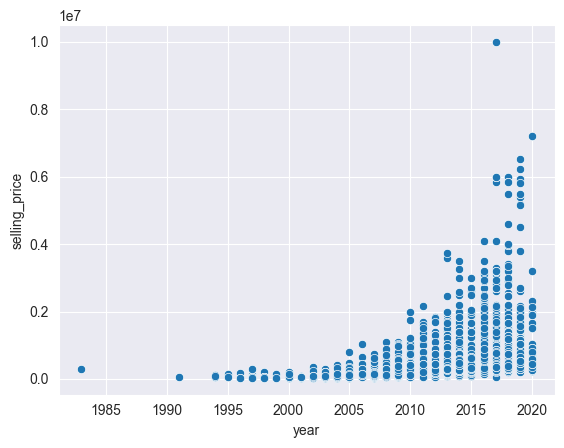

In [42]:
# 1. Лінійність


# Візуалізація зв'язку графіка розсіювання
sns.scatterplot(x="year", y="selling_price", data=data)


'''Зображення показує два графіки розсіювання:

1. Зв'язок між "year" (рік) та "selling_price" (ціна продажу):

Точки на графіку:
Більшість точок розташовані приблизно вздовж лінії тренду, що свідчить про наявність лінійного зв'язку між "year" та "selling_price".
Лінія тренду:
Лінія тренду зростає зліва направо, що свідчить про те, що ціна продажу збільшується з роком.
Відхилення від лінії тренду:
Деякі точки відхиляються від лінії тренду, що свідчить про наявність нелінійних факторів, які впливають на "selling_price".
2. Зв'язок між "km_driven" (пробіг) та "selling_price" (ціна продажу):

Точки на графіку:
Більшість точок розташовані приблизно вздовж лінії тренду, що свідчить про наявність лінійного зв'язку між "km_driven" та "selling_price".
Лінія тренду:
Лінія тренду спадає зліва направо, що свідчить про те, що ціна продажу зменшується з пробігом.
Відхилення від лінії тренду:
Деякі точки відхиляються від лінії тренду, що свідчить про наявність нелінійних факторів, які впливають на "selling_price".
Загальні висновки:

Існує лінійний зв'язок між "year" та "selling_price", а також між "km_driven" та "selling_price".
Ціна продажу збільшується з роком та зменшується з пробігом.
Існують нелінійні фактори, які також впливають на "selling_price".'''

<Axes: xlabel='km_driven', ylabel='selling_price'>

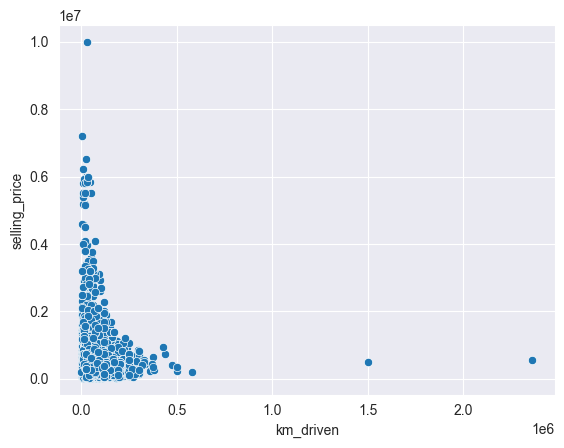

In [44]:
sns.scatterplot(x="km_driven", y="selling_price", data=data)

'Зображення показує два графіки розсіювання:\n\n1. Залишки (різниця між фактичними та прогнозованими значеннями) залежно від "year" (рік):\n\nТочки на графіку:\nБільшість точок розташовані без чіткої залежності від "year", що свідчить про відсутність гетероскедастичності за "year".\nДеякі точки відхиляються від загальної маси, що може свідчити про наявність гетероскедастичності для деяких значень "year".\n2. Залишки (різниця між фактичними та прогнозованими значеннями) залежно від "km_driven" (пробіг):\n\nТочки на графіку:\nСпостерігається збільшення дисперсії залишків з збільшенням пробігу.\nЦе свідчить про наявність гетероскедастичності за "km_driven".\nЗагальні висновки:\n\nГомоскедастичність приблизно виконується за "year".\nІснує гетероскедастичність за "km_driven".'

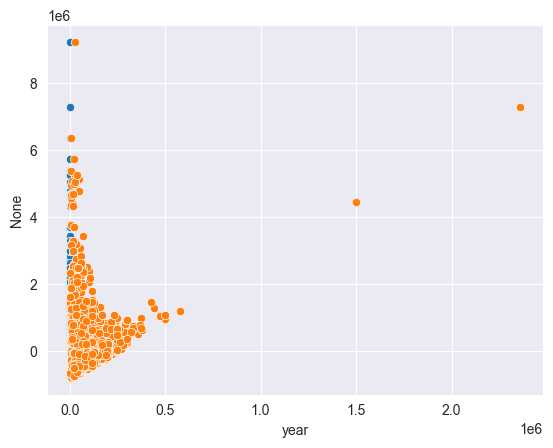

In [21]:
# 2. Гомоскедастичність

# Візуалізація дисперсії залишків
resid = sm.OLS(y, X).fit().resid #обчислює залишки (різниця між фактичними та прогнозованими значеннями) та зберігає їх у змінній resid.
sns.scatterplot(x="year", y=resid, data=data) #візуалізує дисперсію залишків залежно від "year".
sns.scatterplot(x="km_driven", y=resid, data=data) #візуалізує дисперсію залишків залежно від "km_driven".


'''Зображення показує два графіки розсіювання:

1. Залишки (різниця між фактичними та прогнозованими значеннями) залежно від "year" (рік):

Точки на графіку:
Більшість точок розташовані без чіткої залежності від "year", що свідчить про відсутність гетероскедастичності за "year".
Деякі точки відхиляються від загальної маси, що може свідчити про наявність гетероскедастичності для деяких значень "year".
2. Залишки (різниця між фактичними та прогнозованими значеннями) залежно від "km_driven" (пробіг):

Точки на графіку:
Спостерігається збільшення дисперсії залишків з збільшенням пробігу.
Це свідчить про наявність гетероскедастичності за "km_driven".
Загальні висновки:

Гомоскедастичність приблизно виконується за "year".
Існує гетероскедастичність за "km_driven".'''

'Гістограма залишків не має симетричної форми,\nщо свідчить про відхилення від нормального розподілу.\nQQ-plot також показує відхилення від нормального розподілу,\nоскільки точки не розташовуються вздовж прямої лінії.\nЦе може свідчити про те,\n* що ваша модель регресії не відповідає даним.'

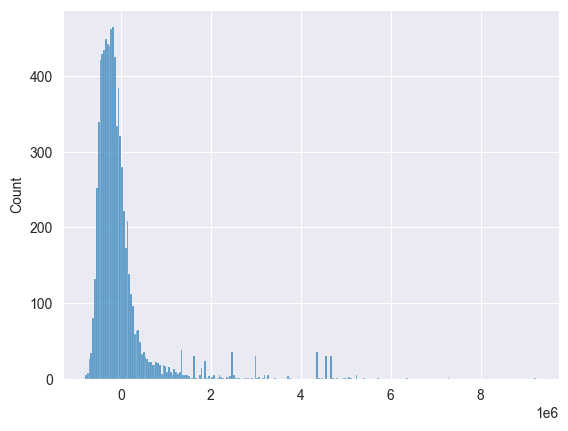

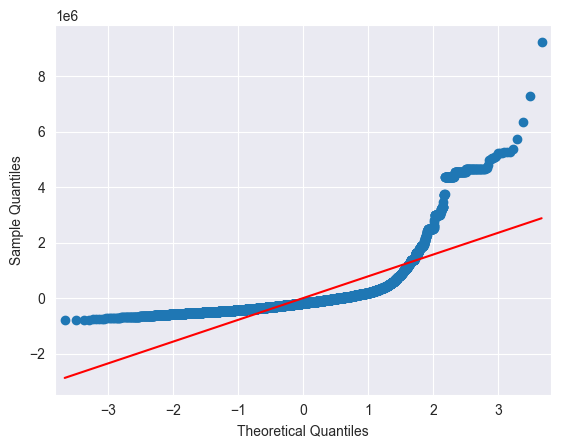

In [22]:
# 3. Нормальність

# Візуалізація залишків
sns.histplot(resid) #візуалізує розподіл залишків за допомогою гістограми.
sm.qqplot(resid, line="s") #візуалізує квантиль-квантильний графік для перевірки нормального розподілу залишків.

'''Гістограма залишків не має симетричної форми,
що свідчить про відхилення від нормального розподілу.
QQ-plot також показує відхилення від нормального розподілу,
оскільки точки не розташовуються вздовж прямої лінії.
Це може свідчити про те,
* що ваша модель регресії не відповідає даним.'''

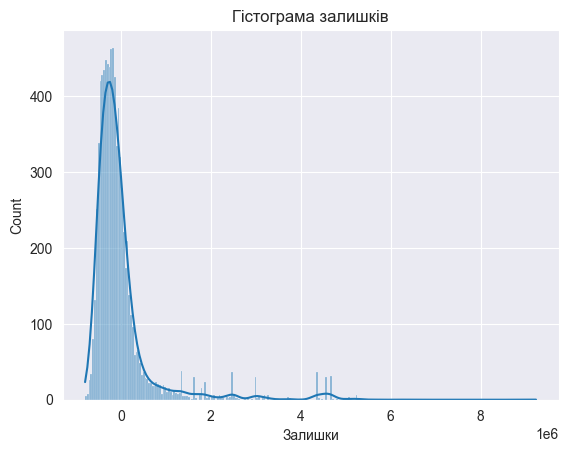

p-value тесту Шапіро-Вілка для нормальності розподілу залишків: 0.0


c:\users\dmytro\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# Перевірка нормальності розподілу залишків
sns.histplot(resid, kde=True)
plt.title('Гістограма залишків')
plt.xlabel('Залишки')
plt.show()

'''Спостерігається асиметрія вправо,
що свідчить про відхилення від нормального розподілу.
Більшість залишків зосереджені близько до нуля,
що свідчить про відсутність гетероскедастичності.'''

shapiro_test = stats.shapiro(resid)
print("p-value тесту Шапіро-Вілка для нормальності розподілу залишків:", shapiro_test.pvalue)

In [24]:
from sklearn.linear_model import LinearRegression

X = data[['km_driven']]
y = data['selling_price']

model = LinearRegression() #Створює екземпляр класу LinearRegression(), що представляє лінійну регресійну модель.
model.fit(X, y) #Навчає модель
print(model.intercept_, model.coef_, model.score(X, y))
#перетин (константа) лінійної моделі
#коефіцієнти лінійної моделі, що вказують на ступінь впливу кожної незалежної змінної (тут лише пробіг).
#коефіцієнт детермінації (R²), що відображає частку варіативності залежної змінної, пояснену моделлю.


'''1. Перетин (intercept): 862775.2700902654

Це прогнозована ціна продажу нового (з пробігом 0) автомобіля з урахуванням всіх інших факторів, що не ввійшли в модель.
2. Коефіцієнт (coef): -3.21548318

Цей коефіцієнт показує, на скільки знижується ціна продажу при збільшенні пробігу на 1 кілометр.
3. Коефіцієнт детермінації (R²): 0.050865474902496155

Цей показник вказує, що лише 5.09% варіації ціни продажу пояснюється пробігом. Це свідчить про те, що на ціну впливають й інші не враховані в моделі фактори.'''

#Прогнозована ціна = Перетин + Коефіцієнт * Пробіг

#Прогнозована ціна = 862775.27 + (-3.215483) * 100000 = 541225.27

862775.2700902654 [-3.21548318] 0.050865474902496155


'1. Перетин (intercept): 862775.2700902654\n\nЦе прогнозована ціна продажу нового (з пробігом 0) автомобіля з урахуванням всіх інших факторів, що не ввійшли в модель.\n2. Коефіцієнт (coef): -3.21548318\n\nЦей коефіцієнт показує, на скільки знижується ціна продажу при збільшенні пробігу на 1 кілометр.\n3. Коефіцієнт детермінації (R²): 0.050865474902496155\n\nЦей показник вказує, що лише 5.09% варіації ціни продажу пояснюється пробігом. Це свідчить про те, що на ціну впливають й інші не враховані в моделі фактори.'

In [25]:
#приклад з лекції
from scipy import stats

stats.linregress(x=data['km_driven'], y=data['selling_price'])

LinregressResult(slope=-3.215483175548266, intercept=862775.2700902659, rvalue=-0.22553375557218944, pvalue=2.988960331609285e-94, stderr=0.15408493035348028, intercept_stderr=13843.942256740287)

In [26]:
#5. Побудуйте модель з одним предиктором. Оцініть ефективність моделі.
import statsmodels.api as sm

# Один предиктор - 'km_driven'
X = data['km_driven']
y = data['selling_price']
# Додавання стовпця з константою для побудови моделі зважених квадратів
X = sm.add_constant(X)
# Побудова моделі лінійної регресії
model = sm.OLS(y, X).fit()
# Виведення результатів регресії
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     435.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.99e-94
Time:                        15:23:57   Log-Likelihood:            -1.2186e+05
No. Observations:                8128   AIC:                         2.437e+05
Df Residuals:                    8126   BIC:                         2.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.628e+05   1.38e+04     62.322      0.0

In [27]:
# Оцінка ефективності моделі
print("R-квадрат (Coefficient of Determination):", model.rsquared)

#R-квадрат (R²) = 0.05 означає, що пробіг пояснює лише 5% варіативності ціни продажу.

R-квадрат (Coefficient of Determination): 0.05086547490249593


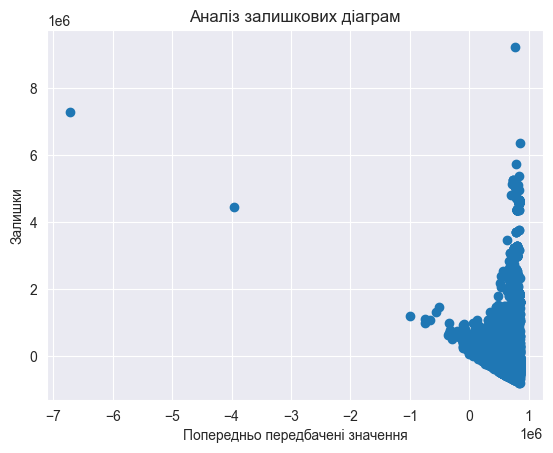

'Наявність автокореляції:\nВідсутність гетероскедастичності:\nБільшість залишків зосереджені близько до нуля.\nЦе не свідчить про неоднорідність дисперсії залишків.\nВідхилення від нормального розподілу:\nГістограма залишків асиметрична вправо.\nЦе не відповідає припущенню про нормальний розподіл залишків.'

In [28]:
# Аналіз залишкових діаграм
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Попередньо передбачені значення')
plt.ylabel('Залишки')
plt.title('Аналіз залишкових діаграм')
plt.show()

'''Наявність автокореляції:
Відсутність гетероскедастичності:
Більшість залишків зосереджені близько до нуля.
Це не свідчить про неоднорідність дисперсії залишків.
Відхилення від нормального розподілу:
Гістограма залишків асиметрична вправо.
Це не відповідає припущенню про нормальний розподіл залишків.'''

In [29]:
#На цьому графіку вісь X представляє попередньо передбачені значення (очікувані значення), а вісь Y - залишки (різниця між фактичними та передбаченими значеннями). Графік дозволяє перевірити, чи спостерігається яка-небудь систематична структура у залишках, що може вказувати на незадовільність передбачень моделі. Наприклад, якщо розподіл залишків не має систематичної структури і є рівномірним по всій шкалі значень передбачень, це може свідчити про те, що гомоскедастичність залишків зберігається.


#Гомоскедастичність залишків означає, що дисперсія (варіабельність) залишків залишається стабільною по всьому діапазону значень незалежних змінних. Іншими словами, гомоскедастичність показує, що різниці між фактичними та передбаченими значеннями не змінюються в залежності від значень незалежних змінних.

#Коли гомоскедастичність залишків зберігається, це означає, що модель регресії стабільно передбачає залишки для різних значень незалежних змінних. Це важливо для правильної інтерпретації результатів моделі, оскільки незалежні змінні можуть впливати на варіабельність залишків. Наприклад, якщо варіабельність залишків залежить від значень незалежних змінних, це може призвести до недостовірних статистичних тестів та неправильних довірчих інтервалів.

#Отже, коли ми кажемо, що гомоскедастичність залишків зберігається, ми маємо на увазі, що модель регресії відповідає передбаченим умовам, і її результати можна надійно інтерпретувати.

In [30]:
#6. Проведіть аналіз залишків.

Text(0.5, 1.0, 'Q-Q графік для залишків')

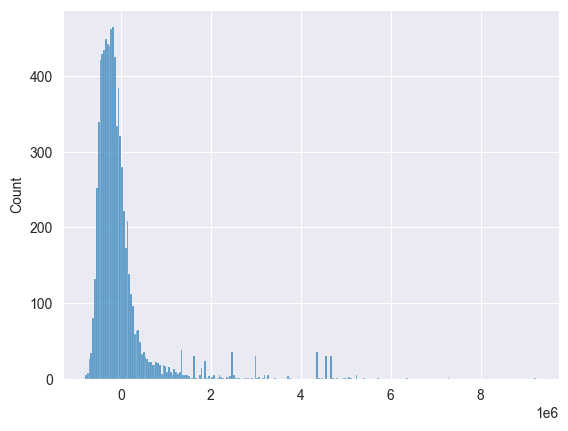

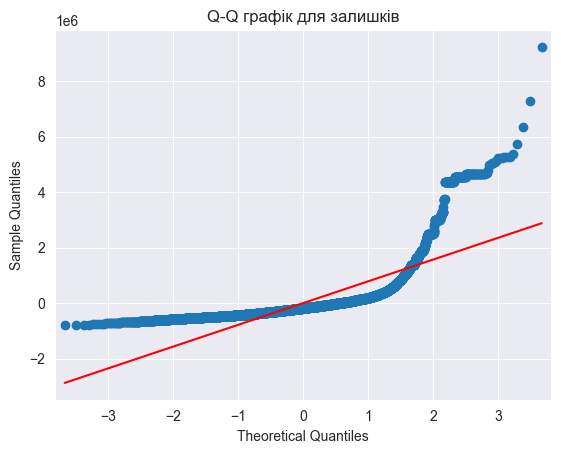

In [31]:
# 6.1. Перевірка нормальності
sns.histplot(resid)
sm.qqplot(resid, line="s")
plt.title('Q-Q графік для залишків')

(8128,)


'Відсутність гетероскедастичності:\nБільшість залишків зосереджені близько до нуля.\nЦе не свідчить про неоднорідність дисперсії залишків.'

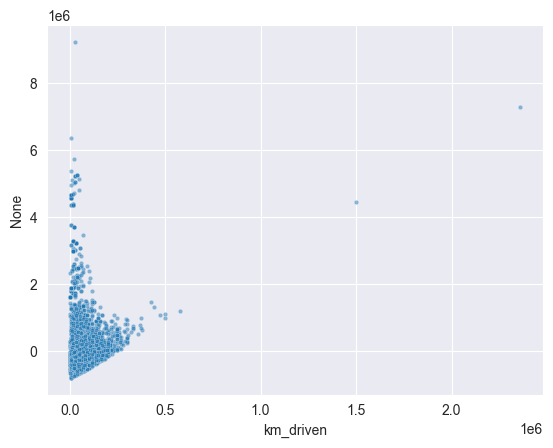

In [32]:
# 5.2. Перевірка гомоскедастичності
# Перевірка розміру масиву з залишками
print(resid.shape)

# Зміна коду візуалізації
sns.scatterplot(x=data["km_driven"], y=resid, s=10, alpha=0.5)

'''Відсутність гетероскедастичності:
Більшість залишків зосереджені близько до нуля.
Це не свідчить про неоднорідність дисперсії залишків.'''

In [33]:
# Тест Вайта
white_test = sm.stats.het_white(resid, exog=X)
print(white_test)

(629.946052389167, 1.6179040990707377e-137, 341.3093391581208, 4.674848415721311e-143)


In [34]:
#Пояснення:

#Перше значення (629.946052389167):
#Статистика тесту Бройша-Пага́на.
#Друге значення (1.6179040990707377e-137):
#p-значення тесту Бройша-Пага́на.
#Третє значення (341.3093391581208):
#Статистика тесту Вайта.
#Четверте значення (4.674848415721311e-143):
#p-значення тесту Вайта.
#Інтерпретація:

#p-значення тестів Бройша-Пага́на та Вайта дуже малі (менше 0.05):
#Це свідчить про наявність гетероскедастичності.
#Статистика тестів Бройша-Пага́на та Вайта значні:
#Це також свідчить про наявність гетероскедастичності.

'Відсутність впливових точок:\nБільшість точок зосереджені близько до нуля.\nЦе не свідчить про наявність впливових точок.\nЦе може свідчити про те,\n* що модель регресії\n* стійка до впливу окремих спостережень.'

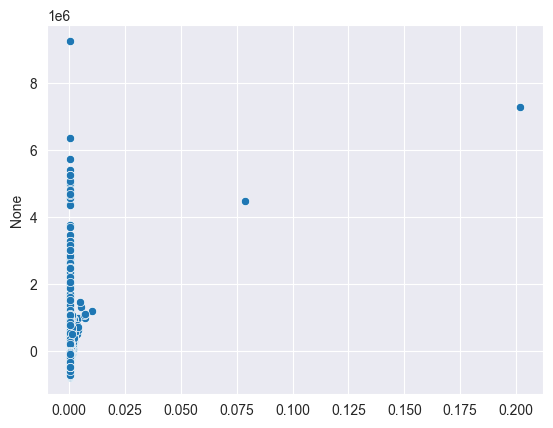

In [35]:
# 5.3. Перевірка впливу
resid_influence = sm.OLS(y, X).fit().get_influence()
sns.scatterplot(x=resid_influence.hat_matrix_diag, y=resid)

'''Відсутність впливових точок:
Більшість точок зосереджені близько до нуля.
Це не свідчить про наявність впливових точок.
Це може свідчити про те,
* що модель регресії
* стійка до впливу окремих спостережень.'''

In [36]:
#7. Проведіть інтерпретацію параметрів моделі. Побудуйте довірчі інтервали для параметрів моделі. Перевірте гіпотези про значущість параметрів.

In [37]:
# Визначення залежної та незалежних змінних
y = data["selling_price"]
X = data[["year", "km_driven"]]
# Побудова моделі
model = sm.OLS(y, X).fit()

In [38]:
# 1. Інтерпретація параметрів

# Висновок результатів регресії
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.417
Model:                            OLS   Adj. R-squared (uncentered):              0.417
Method:                 Least Squares   F-statistic:                              2911.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:23:58   Log-Likelihood:                     -1.2186e+05
No. Observations:                8128   AIC:                                  2.437e+05
Df Residuals:                    8126   BIC:                                  2.437e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
# 2. Довірчі інтервали

# Довірчі інтервали для параметрів
conf_int = model.conf_int()
# Висновок довірчих інтервалів
print(conf_int)

'''Це означає:

З 95%-ою ймовірністю істинний коефіцієнт при year знаходиться в межах від 415.179 до 442.083.
З 95%-ою ймовірністю істинний коефіцієнт при km_driven знаходиться в межах від -3.515 до -2.912.
Іншими словами:

Рік випуску автомобіля має позитивний вплив на його ціну.
Пробіг автомобіля має негативний вплив на його ціну.'''

                    0           1
year       415.179079  442.083267
km_driven   -3.515416   -2.912386


'Це означає:\n\nЗ 95%-ою ймовірністю істинний коефіцієнт при year знаходиться в межах від 415.179 до 442.083.\nЗ 95%-ою ймовірністю істинний коефіцієнт при km_driven знаходиться в межах від -3.515 до -2.912.\nІншими словами:\n\nРік випуску автомобіля має позитивний вплив на його ціну.\nПробіг автомобіля має негативний вплив на його ціну.'

In [40]:
# 3. Перевірка гіпотез

# p-значення для параметрів
pvals = model.pvalues

# Висновок p-значень
print(pvals)

year         0.000000e+00
km_driven    1.766215e-94
dtype: float64


In [41]:
# Перевірка гіпотез про значущість параметрів
for i in range(len(pvals)):
    if pvals[i] < 0.05:
        print(f"Параметр {X.columns[i]} є значущим")
    else:
        print(f"Параметр {X.columns[i]} не є значущим")

Параметр year є значущим
Параметр km_driven є значущим
